In [468]:
import py_block_diagram as pybd

In [469]:
import importlib

In [470]:
importlib.reload(pybd)

<module 'py_block_diagram' from '/Users/kraussry/git/py_block_diagram/py_block_diagram/__init__.py'>

## Note

- the gui doesn't current support if/then blocks with 3 inputs
- I am loading a nearly complete model and then connecting the `bool_input` for the if/then block
- once this is done, code generation should work (I think)
- this should allow me to prove that the rpi can handle the coding and executing the test
- I can fix making the gui create the model with the if/then block later

In [471]:
ls *.csv

cart_pend_5_mega_as_main_arduino_only.csv    teensy_cart_pend_line_follow_P_control.csv
cart_pendulum_vib_suppress_rpi.csv           teensy_cart_pend_plant_and_sensors.csv
line_follow_no_vib_suppress_two_sensors.csv  teensy_cart_pend_plant_and_sensors_2.csv
line_follow_with_vib_suppress_test_1.csv     teensy_cart_pend_plant_and_sensors_3.csv
teensy_cart_pend_1.csv                       teensy_cart_pend_plant_and_sensors_4.csv
teensy_cart_pend_2.csv                       teensy_cart_pend_sensors_only.csv
teensy_cart_pend_OL.csv                      vib_suppress_only_from_notebook.csv
teensy_cart_pend_line_follow.csv


In [472]:
fn = "cart_pendulum_vib_suppress_rpi.csv"

In [473]:
myloader = pybd.csv_block_diagram_loader(fn)

In [474]:
myloader.main()

mydict: {'block_type': 'cart_pendulum', 'variable_name': 'G_cart', 'label': '$G_{cart}$', 'arduino_class': 'plant_with_i2c_double_actuator_and_two_sensors', 'input_block1_name': 'if_then', 'input_block2_name': 'if_then', 'width': 3, 'height': 2, 'placement_type': 'absolute', 'abs_x': 0, 'abs_y': 0, 'rel_block_name': '', 'rel_pos': '', 'rel_distance': '', 'xshift': '', 'yshift': '', 'param1': 'sensor1_name:line_sense', 'param2': 'sensor2_name:pend_enc', 'param3': 'send_address:7', 'param4': '', 'param5': '', 'param6': '', 'param7': '', 'param8': '', 'param9': '', 'param10': ''}
key_value_strs: ['sensor1_name:line_sense', 'sensor2_name:pend_enc', 'send_address:7']
mydict: {'block_type': 'if_block', 'variable_name': 'if_then', 'label': 'if', 'arduino_class': 'if_block', 'input_block1_name': 'adj_sat', 'input_block2_name': 'zero_if_false', 'width': 1.5, 'height': 3, 'placement_type': 'relative', 'abs_x': '', 'abs_y': '', 'rel_block_name': 'G_cart', 'rel_pos': 'left', 'rel_distance': 4, 'xs

In [475]:
mysys = myloader.block_diagram

In [476]:
mysys.block_dict

{'G_cart': <py_block_diagram.cart_pendulum at 0x131a67fa0>,
 'if_then': <py_block_diagram.if_block at 0x1322779a0>,
 'adj_sat': <py_block_diagram.sat2_adjustable_block at 0x13146a880>,
 'zero_if_false': <py_block_diagram.int_constant_block at 0x132a5f2e0>,
 'D': <py_block_diagram.PD_controller at 0x131a67d90>,
 'sum_junct': <py_block_diagram.summing_junction at 0x132a5f250>,
 'U_des_encoder_zero': <py_block_diagram.int_constant_block at 0x132277730>,
 'loop_count': <py_block_diagram.loop_count_block at 0x132a5fc40>,
 'loop_turn_on': <py_block_diagram.int_constant_block at 0x131a678b0>,
 'gt_block': <py_block_diagram.greater_than_block at 0x1322772e0>}

In [477]:
gt = mysys.get_block_by_name('gt_block')

In [478]:
gt

In [479]:
if_then = mysys.get_block_by_name('if_then')

In [480]:
if_then.bool_input = gt

placed_blocks:
G_cart
if_then
adj_sat
zero_if_false
D
sum_junct
U_des_encoder_zero
loop_turn_on
loop_count
gt_block
drawing: G_cart
drawing: if_then
drawing: adj_sat
drawing: zero_if_false
drawing: D
drawing: sum_junct
calling draw_feedback_wire
drawing: U_des_encoder_zero
drawing: loop_count
drawing: loop_turn_on
drawing: gt_block


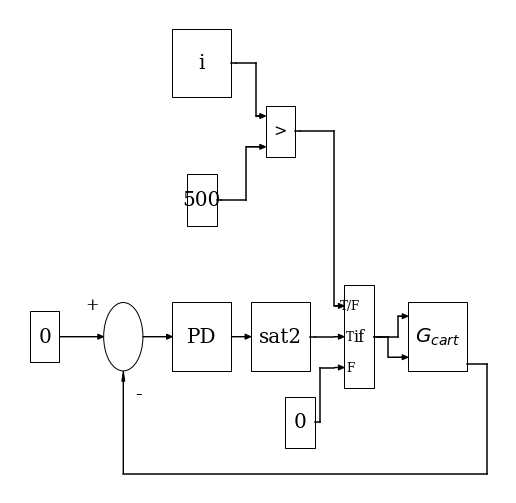

In [481]:
mysys.draw()
mysys.axis_off()

In [482]:
mysys.sensor_name_list

['line_sense', 'pend_enc']

In [483]:
mysys.block_name_list

['G_cart',
 'if_then',
 'adj_sat',
 'zero_if_false',
 'D',
 'sum_junct',
 'U_des_encoder_zero',
 'loop_count',
 'loop_turn_on',
 'gt_block']

In [484]:
PD = mysys.get_block_by_name('D')

In [487]:
PD.Kp = 5

In [488]:
print_name_list = ['loop_count','sum_junct','D','adj_sat','gt_block','if_then']

In [489]:
print_blocks = [mysys.get_block_by_name(item) for item in print_name_list]

In [490]:
pend_enc = mysys.get_sensor_by_name('pend_enc')

In [491]:
print_blocks.append(pend_enc)

In [492]:
mysys.set_print_blocks(print_blocks)

## Finish this:

In [493]:
src_dir = "/Users/kraussry/sabbatical_github/rpi_wiringpi_learn/line_following_control_wiringpi/src"

In [494]:
import os

In [495]:
template_name = "wiringpi_line_following_i2c_template_no_cal.c"

In [496]:
template_path = os.path.join(src_dir,template_name)
template_path

'/Users/kraussry/sabbatical_github/rpi_wiringpi_learn/line_following_control_wiringpi/src/wiringpi_line_following_i2c_template_no_cal.c'

In [497]:
output_name = "wiringpi_line_following_i2c_vib_suppress_autogen.c"

In [498]:
output_path = os.path.join(src_dir, output_name)
output_path

'/Users/kraussry/sabbatical_github/rpi_wiringpi_learn/line_following_control_wiringpi/src/wiringpi_line_following_i2c_vib_suppress_autogen.c'

In [499]:
mysys.generate_rpi_code(output_path,template_path)

EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE

in find_execution_order

EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
after no input stuff, exec_order = [<py_block_diagram.int_constant_block object at 0x132a5f2e0>, <py_block_diagram.int_constant_block object at 0x132277730>, <py_block_diagram.loop_count_block object at 0x132a5fc40>, <py_block_diagram.int_constant_block object at 0x131a678b0>]
remaining_blocks = [<py_block_diagram.cart_pendulum object at 0x131a67fa0>, <py_block_diagram.if_block object at 0x1322779a0>, <py_block_diagram.sat2_adjustable_block object at 0x13146a880>, <py_block_diagram.PD_controller object at 0x131a67d90>, <py_block_diagram.summing_junction object at 0x132a5f250>, <py_block_diagram.greater_than_block object at 0x1322772e0>]
i = 0, j = 0, N = 5
j = 0, N = 5, curblock = if_then
failure, incrementing j
j = 1, N = 5, curblock = adj_sat
failure, incrementing j
j = 2, N = 5, curblock = D
failure, incrementing j
j = 3, N = 5, curblock = sum_junct
success
j = 3, N = 4, curbloc

In [500]:
output_path

'/Users/kraussry/sabbatical_github/rpi_wiringpi_learn/line_following_control_wiringpi/src/wiringpi_line_following_i2c_vib_suppress_autogen.c'